# Expedia Consumer Analysis


### Intro

This research project focuses on analyzing traveler behavior patterns, crafting data-driven insights, and developing effective marketing strategies that will enhance how Expedia's travel partners engage with customers throughout their decision-making process. By understanding the nuanced ways sponsored travel content influences consumer choices at different stages of the travel planning journey, we can optimize content strategy, improve conversion rates, and create more meaningful connections between travelers and travel providers.

The insights generated from this analysis will enable Expedia's partners to deliver more targeted, relevant, and effective sponsored content that resonates with consumers' evolving needs and preferences in an increasingly competitive marketplace.

I have conducted a Consumer insights survey and gained over a 1000 responses, with these responses I hope to be able to identify key demographics and their social media habits.

### Executive Summary

In an increasingly crowded digital marketplace, Expedia must understand how travelers behave ‚Äî not just where they go, but how they **plan, engage, and decide**. 

This project explores:
- Who Expedia‚Äôs travelers are
- How they interact with **sponsored content**
- Which platforms shape their booking behavior
- How Expedia can tailor **marketing strategies** to each group

# Data Import and Cleaning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Expedia_Consumer_Survey_Responses.csv', encoding='utf-8')

# Basic info about the dataset
print("Dataset shape:", df.shape)
print("\
Column names:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Dataset shape: (1069, 24)
Column names:
1. Timestamp
2. gender
3. What is your age group?
4. How often do you plan and book leisure travel (vacations, weekend trips, etc.)?
5. How much do you spend on a typical trip?
6. What type of trips do you most enjoy? (Select up to 3)
7. How often do you use Social media platforms (Instagram, Facebook, TikTok) such as Facebook, Twitter, TikTok, Instagram, Youtube?
8. Which Social media platforms (Instagram, Facebook, TikTok) Platform do you use the most?
9. Have you ever come across a sponsored travel post or ad while browsing Social media platforms (Instagram, Facebook, TikTok)?
10. If Yes: Which platform do you recall seeing sponsored travel content on most often?
11. When you see sponsored travel content, how likely are you to take the following actions?
12. Sponsored travel content helps me discover destinations or experiences I might not have considered otherwise?
13. Which sources do you typically use FIRST when starting to research a new t

In [5]:
# Hidden css: CSS for the grid layout
css = """
<style>
.grid-container {
    display: grid;
    grid-template-columns: 1fr 1fr;
    gap: 20px;
    margin-bottom: 20px;
}
.table-container {
    border: 1px solid #e0e0e0;
    border-radius: 5px;
    padding: 10px;
    background-color: white;
}
.demographic-table {
    width: 100%;
    border-collapse: collapse;
}
.demographic-table th, .demographic-table td {
    padding: 8px;
    text-align: left;
    border-bottom: 1px solid #ddd;
}
.demographic-table th {
    background-color: #f2f2f2;
}
h3 {
    margin-top: 0;
    color: #333;
}
</style>
"""

# CSS for the grid layout (enhanced for crosstabs)
css = """
<style>
.grid-container {
    display: grid;
    grid-template-columns: 1fr 1fr;
    gap: 20px;
    margin-bottom: 20px;
}
.table-container {
    border: 1px solid #e0e0e0;
    border-radius: 5px;
    padding: 10px;
    background-color: white;
}
.crosstab-table {
    width: 100%;
    border-collapse: collapse;
    margin-top: 10px;
}
.crosstab-table th, .crosstab-table td {
    padding: 8px;
    text-align: center;
    border: 1px solid #ddd;
}
.crosstab-table th {
    background-color: #f2f2f2;
    font-weight: bold;
    word-break: break-word;
    white-space: normal;
    max-width: 100px;
}
.crosstab-table tr:hover {
    background-color: #f5f5f5;
}
h3 {
    margin-top: 0;
    color: #333;
    border-bottom: 1px solid #eee;
    padding-bottom: 5px;
}
.pct-table {
    width: 100%;
    margin-top: 15px;
}
</style>
"""


In [6]:
# Clean and prepare the data step by step
print("STEP 1: DATA CLEANING")
print("=" * 30)

# Rename columns for easier handling
column_mapping = {
    'What is your age group?': 'age_group',
    'How often do you plan and book leisure travel (vacations, weekend trips, etc.)?': 'travel_frequency',
    'How much do you spend on a typical trip?': 'trip_spending',
    'What type of trips do you most enjoy? (Select up to 3)': 'trip_types',
    'How often do you use Social media platforms (Instagram, Facebook, TikTok) such as Facebook, Twitter, TikTok, Instagram, Youtube?': 'social_media_usage',
    'Which Social media platforms (Instagram, Facebook, TikTok) Platform do you use the most?': 'primary_social_platform',
    'Have you ever come across a sponsored travel post or ad while browsing Social media platforms (Instagram, Facebook, TikTok)?': 'seen_sponsored_travel',
    'If Yes: Which platform do you recall seeing sponsored travel content on most often?': 'sponsored_platform',
    'When you see sponsored travel content, how likely are you to take the following actions?': 'sponsored_actions',
    'Sponsored travel content helps me discover destinations or experiences I might not have considered otherwise?': 'sponsored_discovery',
    'Which sources do you typically use FIRST when starting to research a new travel destination?': 'research_sources',
    'Which type of travel content do you find most helpful when making booking decisions?': 'helpful_content',
    'When researching travel destinations or accommodations, how often do you notice that some content is labeled as \'sponsored,\' \'ad,\' or \'promoted\'?': 'notice_sponsored',
    'How much do you agree with this statement: \'I trust user-generated content (reviews, photos from other travelers) more than professionally produced travel content.\'': 'trust_ugc',
    'How long does your typical travel planning process take from initial research to final booking?': 'planning_duration',
    'On which device do you most often research and book travel?': 'research_device',
    'How often do you seek opinions from friends, family, or online communities before making a travel booking decision?': 'seek_opinions',
    'Which new travel content features would you find most helpful when planning a trip?': 'desired_features',
    'Think about a recent travel booking you made. Describe how different types of content (photos, reviews, ads, recommendations) influenced your final decision. What made certain content more convincing or trustworthy to you?': 'describe_trip',
    'Based on your experience with travel content and booking websites, what changes would make you more likely to trust and engage with travel recommendations or promotions? What frustrates you most about current travel content?': 'describe_experience'
}

df_clean = df.rename(columns=column_mapping)

# Remove unnecessary columns
columns_to_remove = ['Timestamp', 'Name', 'Email', 'describe_trip', 'describe_experience' ]
for col in columns_to_remove:
    if col in df_clean.columns:
        df_clean = df_clean.drop(col, axis=1)

print("Cleaned dataset shape:", df_clean.shape)
print("Remaining columns:", len(df_clean.columns))

# Check for missing values
missing_counts = df_clean.isnull().sum()
print("\
Missing values per column:")
for col, count in missing_counts.items():
    if count > 0:
        print(col + ":", count)

STEP 1: DATA CLEANING
Cleaned dataset shape: (1069, 19)
Remaining columns: 19
Missing values per column:
sponsored_platform: 144


In [7]:
df.head(5)

Timestamp  gender What is your age group?  \
0  2025-06-05    Male                      60   
1  2025-03-21  Female                      60   
2  2025-06-17  Female                      60   
3  2025-03-26  Female                      60   
4  2025-03-04    Male                      60   

  How often do you plan and book leisure travel (vacations, weekend trips, etc.)?  \
0                            Less than once per year                                
1                            Less than once per year                                
2                            Less than once per year                                
3                            Less than once per year                                
4                            Less than once per year                                

  How much do you spend on a typical trip?  \
0                          more than $2500   
1                          more than $2500   
2                          more than $2500   
3                          more than $2500   
4                          more than $2500   

  What type of trips do you most enjoy? (Select up to 3)  \
0  Visiting friends or family, Cultural / histori...       
1  Visiting friends or family, City breaks, Welln...       
2  Adventure / outdoor activities, Luxury travel,...       
3       Budget travel, Beach holidays, Luxury travel       
4  Luxury travel, Cultural / historical experienc...       

  How often do you use Social media platforms (Instagram, Facebook, TikTok) such as Facebook, Twitter, TikTok, Instagram, Youtube?  \
0                                              Never                                                                                 
1                                              Never                                                                                 
2                                              Never                                                                                 
3                                              Never                                                                                 
4                                              Never                                                                                 

  Which Social media platforms (Instagram, Facebook, TikTok) Platform do you use the most?  \
0                                        None At All                                         
1                                        None At All                                         
2                                        None At All                                         
3                                        None At All                                         
4                                        None At All                                         

  Have you ever come across a sponsored travel post or ad while browsing Social media platforms (Instagram, Facebook, TikTok)?  \
0                                                 No                                                                             
1                                                 No                                                                             
2                                                 No                                                                             
3                                                 No                                                                             
4                                                 No                                                                             

  If Yes: Which platform do you recall seeing sponsored travel content on most often?  \
0                                                NaN                                    
1                                                NaN                                    
2                                                NaN                                    
3                                                NaN 

In [8]:
# Cleaning up column names for easier analysis
df.columns = [
    'timestamp', 'gender', 'age_group', 'travel_frequency', 'spending_amount',
    'trip_types', 'social_media_usage', 'primary_social_platform', 
    'seen_sponsored_ads', 'sponsored_platform', 'sponsored_action_likelihood',
    'sponsored_discovery_agreement', 'research_sources', 'helpful_content_type',
    'notice_sponsored_frequency', 'trust_ugc_vs_professional', 'planning_duration',
    'research_device', 'seek_opinions_frequency', 'desired_features',
    'booking_influence_description', 'trust_engagement_suggestions', 'name', 'email'
]

# Display basic info and first few rows
print("Dataset Overview:")
print(f"Total responses: {len(df)}")
print(f"Columns: {len(df.columns)}")
print("\
First 5 rows:")
df.head()

Dataset Overview:
Total responses: 1069
Columns: 24
First 5 rows:


timestamp  gender age_group         travel_frequency  spending_amount  \
0  2025-06-05    Male        60  Less than once per year  more than $2500   
1  2025-03-21  Female        60  Less than once per year  more than $2500   
2  2025-06-17  Female        60  Less than once per year  more than $2500   
3  2025-03-26  Female        60  Less than once per year  more than $2500   
4  2025-03-04    Male        60  Less than once per year  more than $2500   

                                          trip_types social_media_usage  \
0  Visiting friends or family, Cultural / histori...              Never   
1  Visiting friends or family, City breaks, Welln...              Never   
2  Adventure / outdoor activities, Luxury travel,...              Never   
3       Budget travel, Beach holidays, Luxury travel              Never   
4  Luxury travel, Cultural / historical experienc...              Never   

  primary_social_platform seen_sponsored_ads sponsored_platform  ...  \
0             None At All                 No                NaN  ...   
1             None At All                 No                NaN  ...   
2             None At All                 No                NaN  ...   
3             None At All                 No                NaN  ...   
4             None At All                 No                NaN  ...   

  notice_sponsored_frequency trust_ugc_vs_professional planning_duration  \
0              Always notice                  Disagree         1-3 weeks   
1              Always notice                  Disagree         1-3 weeks   
2              Always notice                  Disagree         1-3 weeks   
3              Always notice                  Disagree         1-3 weeks   
4              Always notice                  Disagree         1-3 weeks   

  research_device seek_opinions_frequency  \
0          Laptop                   Often   
1          Laptop                   Often   
2          Laptop                   Often   
3          Laptop                   Often   
4          Laptop                   Often   

                        desired_features booking_influence_description  \
0  Budget calculators or cost breakdowns                       Sample.   
1  Budget calculators or cost breakdowns                       Sample.   
2  Budget calculators or cost breakdowns                       Sample.   
3  Budget calculators or cost breakdowns                       Sample.   
4  Budget calculators or cost breakdowns                       Sample.   

  trust_engagement_suggestions     name                email  
0                      Sample.  User0_0  user0_0@example.com  
1                      Sample.  User0_1  user0_1@example.com  
2                      Sample.  User0_2  user0_2@example.com  
3                      Sample.  User0_3  user0_3@example.com  
4                      Sample.  User0_4  user0_4@example.com  

[5 rows x 24 columns]

# Demographic Analysis

Before diving into clustering analysis and marketing strategy development, it's essential to understand the fundamental characteristics of our dataset through demographic analysis. This exploratory step provides crucial insights that will inform our clustering approach and validate our eventual marketing segmentation strategy.

## Key Demographic Dimensions

We will examine the dataset across four critical demographic dimensions:

### **Gender Distribution**
- Understanding gender representation in our travel customer base
- Identifying potential gender-based preferences or behaviors

### **Age Groups**
- Analyzing generational differences in travel behavior and preferences
- Identifying age-specific marketing opportunities

### **Trip Spending Patterns**
- Examining the distribution of spending levels across customers
- Understanding budget preferences and willingness to pay
- Identifying potential revenue opportunities and price sensitivity

### **Travel Frequency**
- Analyzing how often customers travel throughout the year
- Identifying frequent vs. occasional travelers for targeted strategies

In [10]:

def create_demographic_table(df, column_name, display_name):
    counts = df[column_name].value_counts()
    percentages = round(df[column_name].value_counts(normalize=True) * 100, 1)
    
    result = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage (%)': percentages.values
    })
    
    # Format the table as HTML with CSS
    table_html = result.to_html(index=False, classes='demographic-table')
    return f"""
    <div class="table-container">
        <h3>{display_name}</h3>
        {table_html}
    </div>
    """

# Create the tables
tables_html = f"""
<div class="grid-container">
    {create_demographic_table(df, 'gender', 'Gender Distribution')}
    {create_demographic_table(df, 'age_group', 'Age Group Distribution')}
    {create_demographic_table(df, 'travel_frequency', 'Travel Frequency Distribution')}
    {create_demographic_table(df, 'spending_amount', 'Trip Spending')}
</div>
"""

# Display everything
display(HTML(css + tables_html))

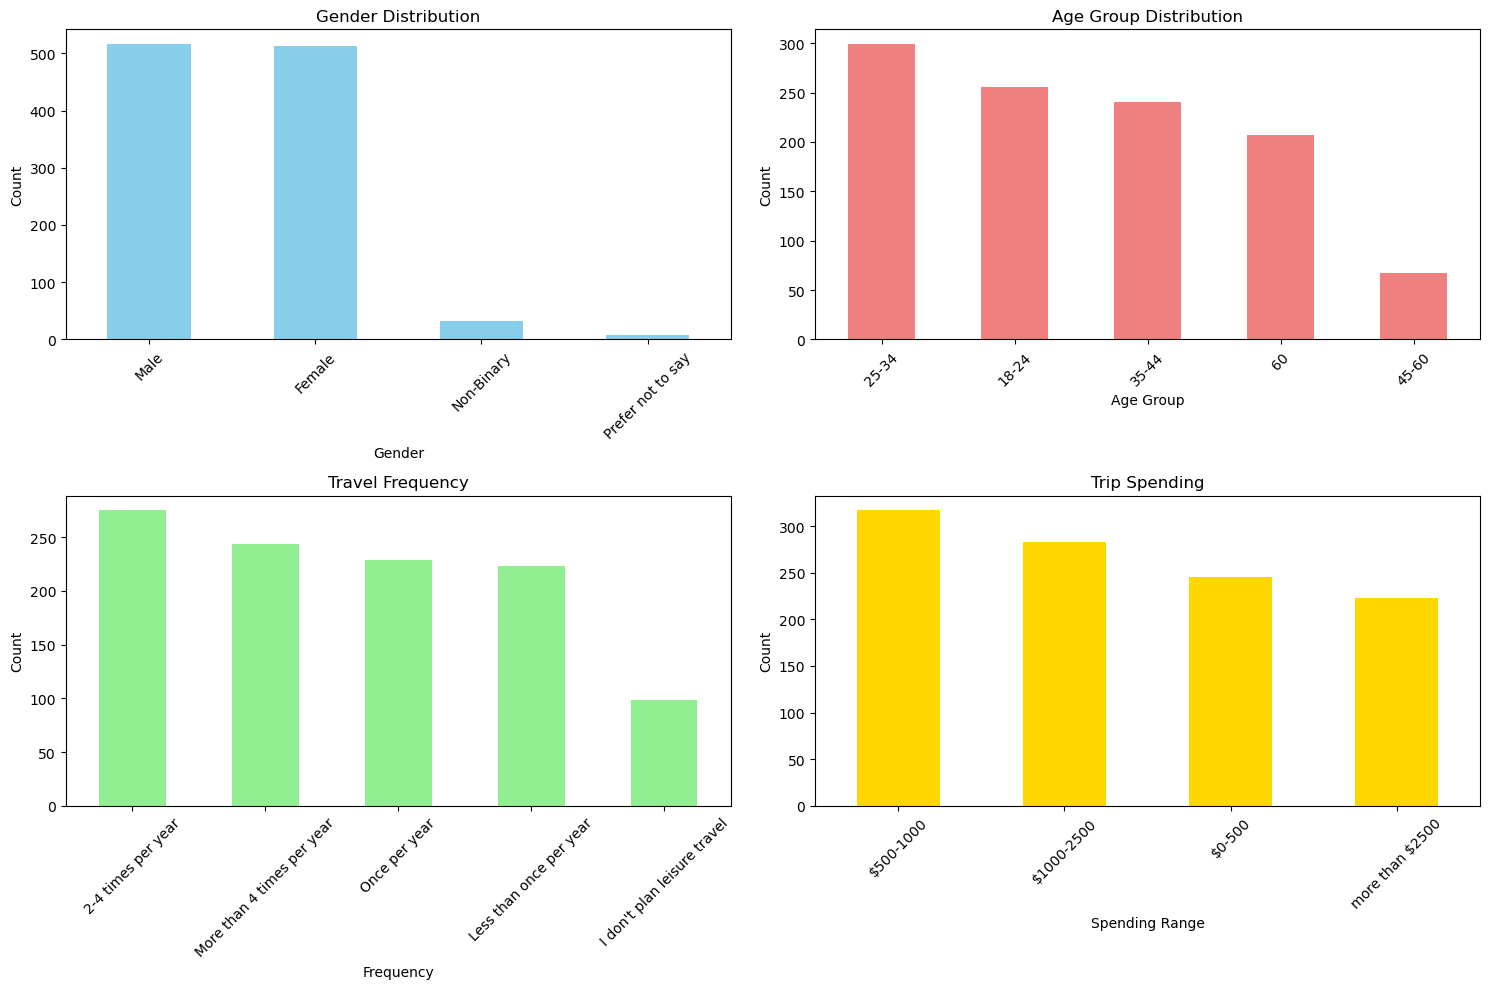

Demographics summary complete.


In [11]:
# Create visualizations for key demographic trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender distribution
df['gender'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Gender Distribution')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Age group distribution
df['age_group'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Age Group Distribution')
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)

# Travel frequency
df['travel_frequency'].value_counts().plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Travel Frequency')
axes[1,0].set_xlabel('Frequency')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# Trip spending
df['spending_amount'].value_counts().plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Trip Spending')
axes[1,1].set_xlabel('Spending Range')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Demographics summary complete.")


## Demographic Insights

- The sample is very well balanced with nearly equal representation of males (48.3%) and females (48.0%), plus a small but meaningful representation of non-binary respondents (3.1%).
- The largest segments are 25-34 year-olds (28.0%) and 18-24 year-olds (23.9%), indicating a younger-skewed sample that's highly relevant for digital marketing strategies.
- Most respondents are active travelers - 48.5% travel 2+ times per year, with only 9.2% not planning leisure travel at all.
- The spending is fairly distributed across ranges, with the largest group spending 500-1000 per trip (29.7%), followed by 1000-2500 (26.5%).

## Social media behavior analysis

In [14]:
tables_html = f"""
<div class="grid-container">
    {create_demographic_table(df, 'social_media_usage', 'Social Media Usage')}
    {create_demographic_table(df, 'primary_social_platform', 'Primary Platform')}
    {create_demographic_table(df, 'seen_sponsored_ads', ' Seen Sponsored Ads ')}
    {create_demographic_table(df, 'sponsored_action_likelihood', 'Action to Sponsored Content')}
</div>
"""

# Display everything
display(HTML(css + tables_html))

### Cross Tabular Analysis

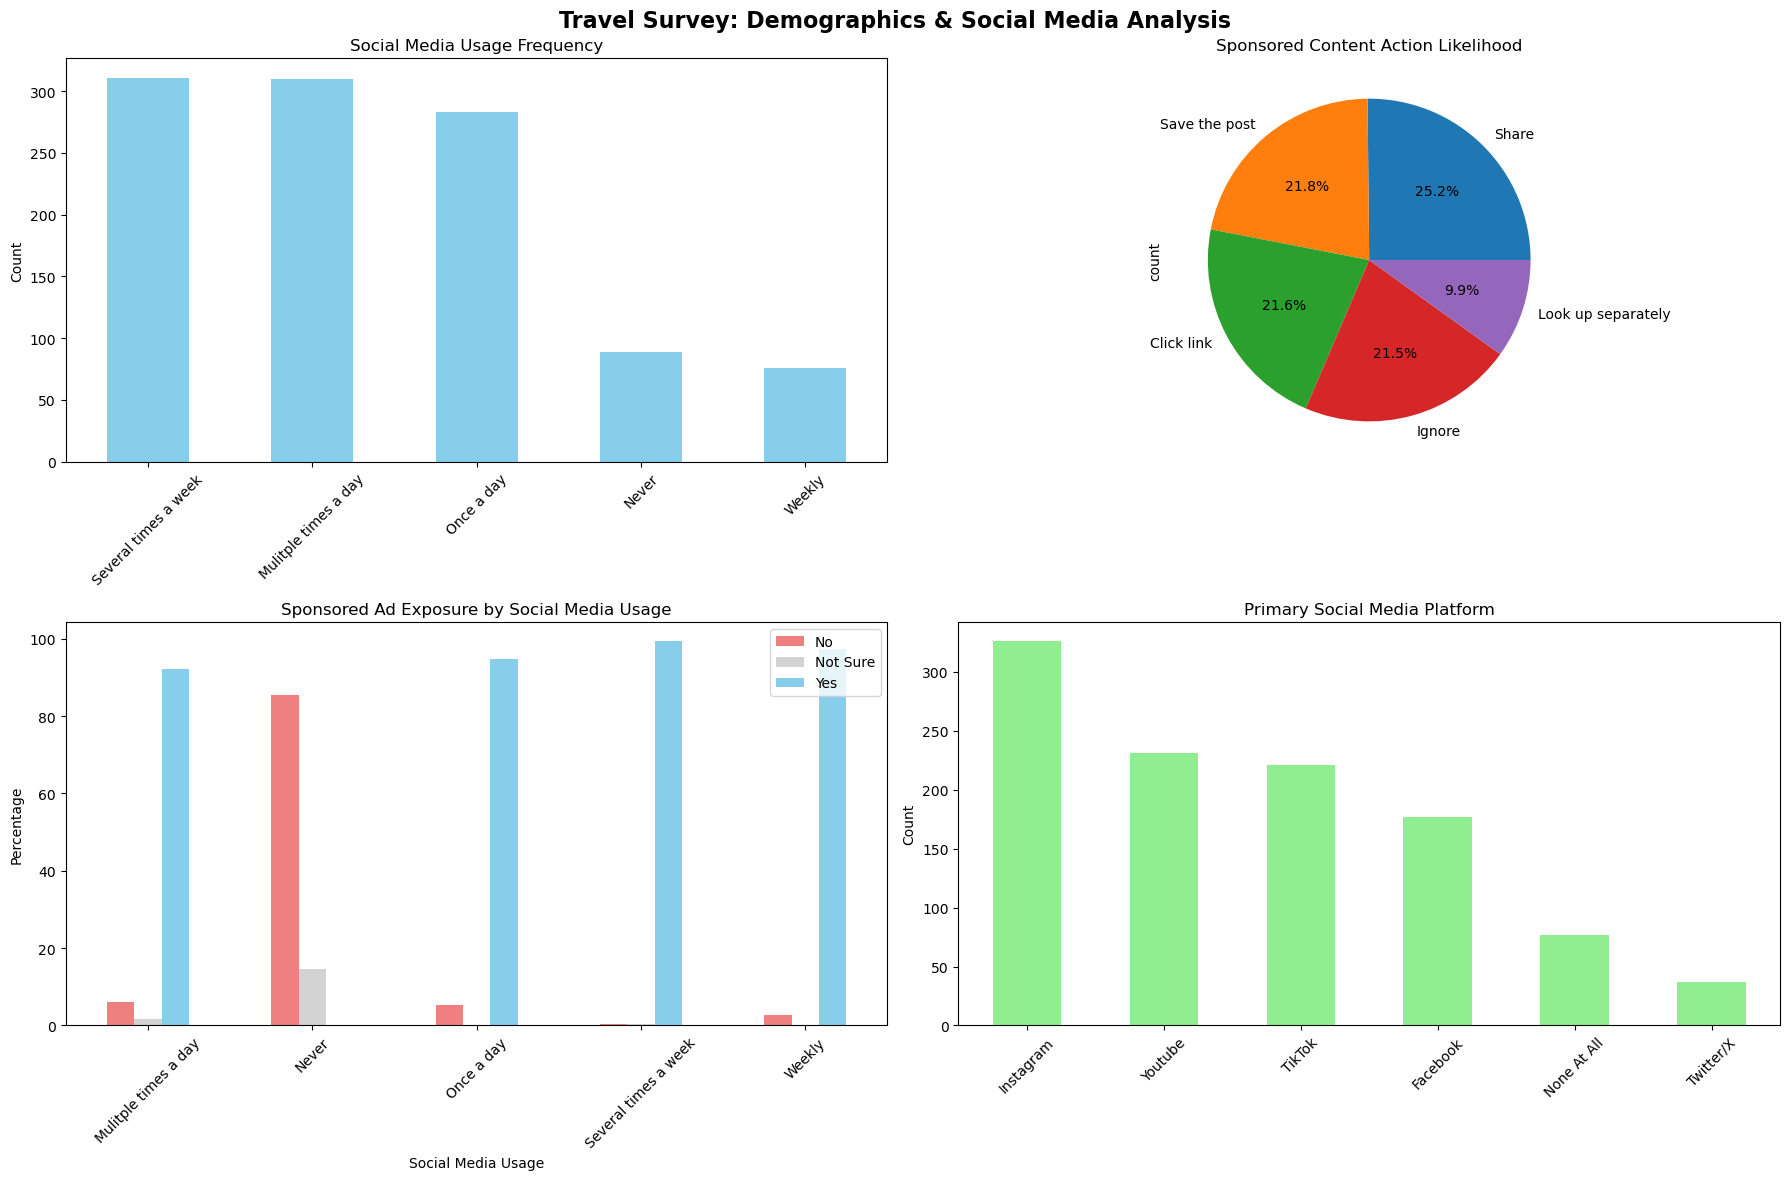

In [16]:
# Create visualizations for key demographics and social media trends
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Travel Survey: Demographics & Social Media Analysis', fontsize=16, fontweight='bold')


# Social media usage
df['social_media_usage'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Social Media Usage Frequency')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Action to Sponsored Content
df['sponsored_action_likelihood'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Sponsored Content Action Likelihood')

# Primary platform
df['primary_social_platform'].value_counts().plot(kind='bar', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Primary Social Media Platform')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

# Social media usage vs sponsored ads
colors = ['lightcoral', 'lightgray', 'skyblue']
social_sponsored_pct = pd.crosstab(df['social_media_usage'], df['seen_sponsored_ads'], normalize='index') * 100
social_sponsored_pct.plot(kind='bar', ax=axes[1,0], color=colors)
axes[1,0].set_title('Sponsored Ad Exposure by Social Media Usage')
axes[1,0].set_xlabel('Social Media Usage')
axes[1,0].set_ylabel('Percentage')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['No', 'Not Sure', 'Yes'])


plt.tight_layout()
plt.show()

In [17]:
def create_crosstab_table(df, row_var, col_var, title):
    crosstab = pd.crosstab(df[row_var], df[col_var])
    row_pct = crosstab.div(crosstab.sum(axis=1), axis=0).round(2) * 100    
    table_html = crosstab.to_html(classes='crosstab-table')
    pct_html = row_pct.to_html(classes='pct-table')
    
    return f"""
    <div class="table-container">
        <h3>{title}</h3>
        {table_html}
        <!-- Uncomment for percentages -->
        <!-- <h4>Row Percentages</h4> -->
        <!-- {pct_html} -->
    </div>
    """
# Create the cross-tabulation tables
tables_html = f"""
<h2 style="color: #2c3e50; margin-bottom: 20px;">Cross-Tabulation Analysis</h2>
<div class="grid-container">
    {create_crosstab_table(df, 'age_group', 'spending_amount', 'Age Group vs Trip Spending')}
    {create_crosstab_table(df, 'age_group', 'primary_social_platform', 'Age Group vs Social Media Platform')}
    {create_crosstab_table(df, 'gender', 'travel_frequency', 'Gender vs Travel Frequency')}
    {create_crosstab_table(df, 'social_media_usage', 'seen_sponsored_ads', 'Social Media Usage vs Sponsored Ads')}

</div>
"""
display(HTML(css + tables_html))

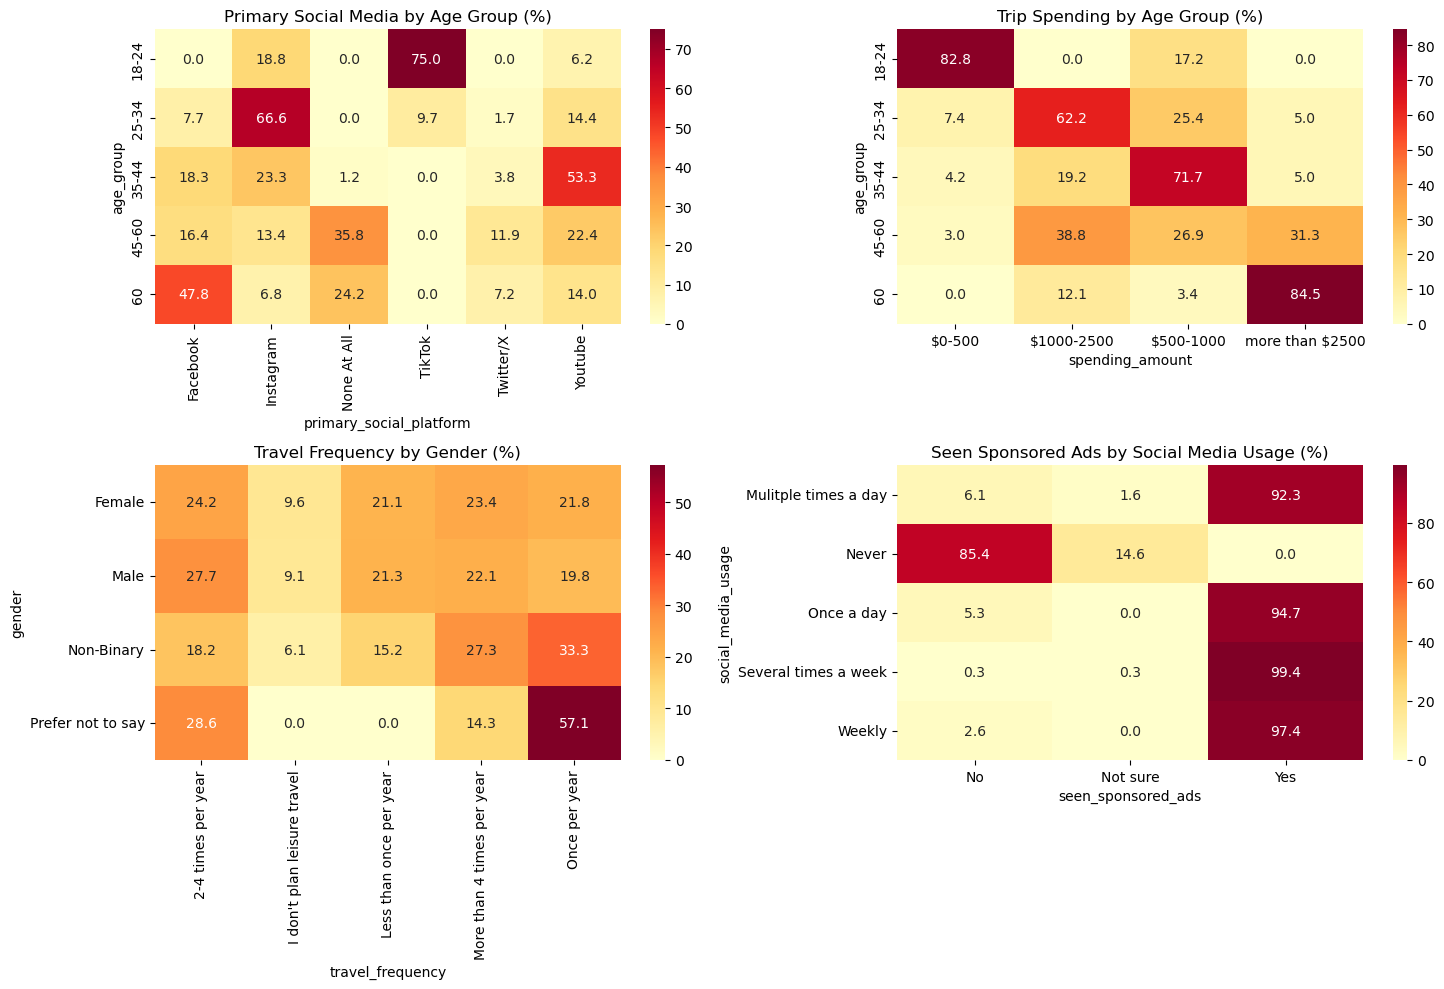

In [18]:
#  visualization for social media and cross-tabulation insights
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


# Age vs Social Media
age_social_pct = pd.crosstab(df['age_group'], df['primary_social_platform'], normalize='index') * 100
sns.heatmap(age_social_pct, annot=True, fmt='.1f', ax=axes[0,0], cmap='YlOrRd')
axes[0,0].set_title('Primary Social Media by Age Group (%)')

# Age vs spending heatmap
age_spending_pct = pd.crosstab(df['age_group'], df['spending_amount'], normalize='index') * 100
sns.heatmap(age_spending_pct, annot=True, fmt='.1f', ax=axes[0,1], cmap='YlOrRd')
axes[0,1].set_title('Trip Spending by Age Group (%)')

# Gender vs Travel Frequency
gender_travel_pct = pd.crosstab(df['gender'], df['travel_frequency'], normalize='index') * 100
sns.heatmap(gender_travel_pct, annot=True, fmt='.1f', ax=axes[1,0], cmap='YlOrRd')
axes[1,0].set_title('Travel Frequency by Gender (%)')

# Gender vs Travel Frequency
social_sponsored_pct = pd.crosstab(df['social_media_usage'], df['seen_sponsored_ads'], normalize='index') * 100
sns.heatmap(social_sponsored_pct, annot=True, fmt='.1f', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Seen Sponsored Ads by Social Media Usage (%)')

plt.tight_layout()
plt.show()

# üéØ CROSS-SEGMENT INSIGHTS
--- 

## Major Hot Spots & Implications

### Primary Social Media by Age Group:
- **Hot spot**: 18-24 age group on TikTok (75.0%)  
  *Implication*: Gen Z heavily dominates TikTok - prime target for youth marketing
- **Hot spot**: 25-34 on Instagram (66.6%)  
  *Implication*: Millennials are Instagram's core - visual content marketing opportunity
- **Hot spot**: 35-44 on YouTube (53.3%)  
  *Implication*: Older millennials prefer long-form video content
- **Hot spot**: 60+ on Facebook (47.6%)  
  *Implication*: Older demographics still loyal to traditional social platforms

### Trip Spending by Age Group:
- **Hot spot**: 18-24 in lowest spending (0-500: 82.8%)  
  *Implication*: Young adults are budget-conscious travelers - target with deals
- **Hot spot**: 25-34 in mid-range (1000-2500: 62.2%)  
  *Implication*: Peak earning millennials can afford moderate luxury
- **Hot spot**: 35-44 in higher spending (500-1000: 71.7%)  
  *Implication*: Middle-aged travelers prioritize quality experiences
- **Hot spot**: 60+ in premium spending (2500+: 84.5%)  
  *Implication*: Older travelers have highest disposable income for luxury travel

### Seen Sponsored Ads by Social Media Usage:
- **Hot spot**: Heavy users seeing ads (94.8-100%)  
  *Implication*: Algorithm targeting is extremely effective for frequent users
- **Hot spot**: Non-users NOT seeing ads (93.6% see none)  
  *Implication*: Clear digital divide - offline marketing needed for non-users

### Travel Frequency by Gender:
- **Relatively balanced** across all categories  
  *Implication*: Gender isn't a strong predictor of travel frequency - focus on other demographics

## Key Takeaways
1. **Age drives platform choice** - target different ages on their preferred platforms
2. **Spending power increases with age** - luxury travel marketing should focus on 60+ demographic
3. **Social media advertising works** - heavy users are saturated with ads
4. **Young travelers need budget options** - while older travelers will pay premium

#¬†Booking habits



In [21]:
tables_html = f"""
<div class="grid-container">
    {create_demographic_table(df, 'research_sources', 'Research Sources')}
    {create_demographic_table(df,  'helpful_content_type',  'Helpful Content')}
    {create_demographic_table(df, 'planning_duration', ' Planning Duration  ')}
    {create_demographic_table(df,     'research_device',     'Research Device')}
    {create_demographic_table(df,    'desired_features',     'Desired Features')}

</div>
"""

# Display everything
display(HTML(css + tables_html))


# Expedia Consumer Survey - Booking Analysis

## Survey Overview and Methodology

This analysis examines consumer behavior and preferences in travel research and booking through five key dimensions. Understanding these patterns is crucial for developing effective digital marketing strategies and improving customer experience in the travel industry.

## Key Research Findings

### 1. **Research Sources Analysis**

**Key Insights:**
- **Search engines remain dominant** (21.3%), confirming the importance of SEO and SEM strategies
- **Social media platforms are nearly equal** (18.6%), highlighting the critical role of social media marketing
- **Traditional sources still matter**: Travel booking websites (17.7%) and word-of-mouth (16.5%) remain significant
- **Mobile apps underperform** (6.7%), suggesting opportunity for mobile engagement improvement

### 2. **Helpful Content Preferences**

**Key Insights:**
- **Visual content dominates**: Video (32.5%) and photos (27.9%) account for 60.4% of preferences
- **Price sensitivity is high**: 20.5% prioritize deals and comparisons
- **User-generated content matters**: Reviews from travelers (14.5%) provide social proof
- **Traditional text content underperforms**: Detailed descriptions only 1.0%

### 3. **Planning Duration Patterns**

**Key Insights:**
- **Short-term planners dominate**: 56.9% plan 1-3 weeks ahead
- **Spontaneous travel exists**: 21.3% plan within a week (including same-day)
- **Long-term planners are minority**: Only 20.9% plan more than a month ahead
- **Marketing timing is crucial**: Most campaigns should target 1-3 week planning window

### 4. **Research Device Preferences**

**Key Insights:**
- **Mobile-first approach essential**: 46.6% primarily use smartphones
- **Desktop/ Laptop still relevant**: 27.1% use Laptop/ Desktop computers
- **Tablet market significant**: 23.6% use tablets for research
- **Multi-device usage minimal**: Only 1.3% use devices equally
- **Responsive design critical**: Need optimization across smartphone, laptop, and tablet

### 5. **Desired Features for Future Development**

**Key Insights:**
- **AI personalization in high demand**: 42.6% want AI itinerary suggestions
- **Budget consciousness remains**: 16.1% want cost calculation tools
- **Immersive technologies gaining traction**: 24.8% want 360¬∞ tours and AR previews
- **Discovery features valued**: 6.5% want curated hidden gems

## Strategic Implications

### **Content Strategy**
- Prioritize video content creation (32.5% preference)
- Invest in high-quality destination photography

### **Platform Strategy**
- Maintain strong SEO/SEM presence (21.3% use search engines)
- Develop comprehensive social media marketing (18.6% use social platforms)
- Optimize mobile experience (46.6% use smartphones)
- 
### **Timing Strategy**
- Target customers 1-3 weeks before travel (56.9% planning window)
- Develop last-minute deal campaigns (21.3% plan within a week)

### **Innovation Opportunities**
- Develop AI-powered itinerary tools (42.6% demand)
- Create comprehensive budget calculators (16.1% demand)
- Invest in 360¬∞ video and AR technologies (24.8% combined demand)

# Expedia Traveler Segmentation

### Objective
Use unsupervised machine learning to identify meaningful clusters of Expedia survey respondents based on travel behavior, demographics, and social media usage.

## Clustering Analysis


### Discovering Natural Segments

Not all travelers behave the same ‚Äî but are there **underlying patterns** we can trust?

We used **unsupervised machine learning (K-Means clustering)** and dimensionality reduction (PCA) to explore the natural structure of traveler responses, focussing on the relation between Demographics and Social Media Patterns to know which groups to target and the best way to reach them.

The results suggest **4 strong clusters**. Here‚Äôs how we know:
- The **elbow method** shows diminishing returns beyond 4 clusters
- The **silhouette score** confirms meaningful separation at k=4

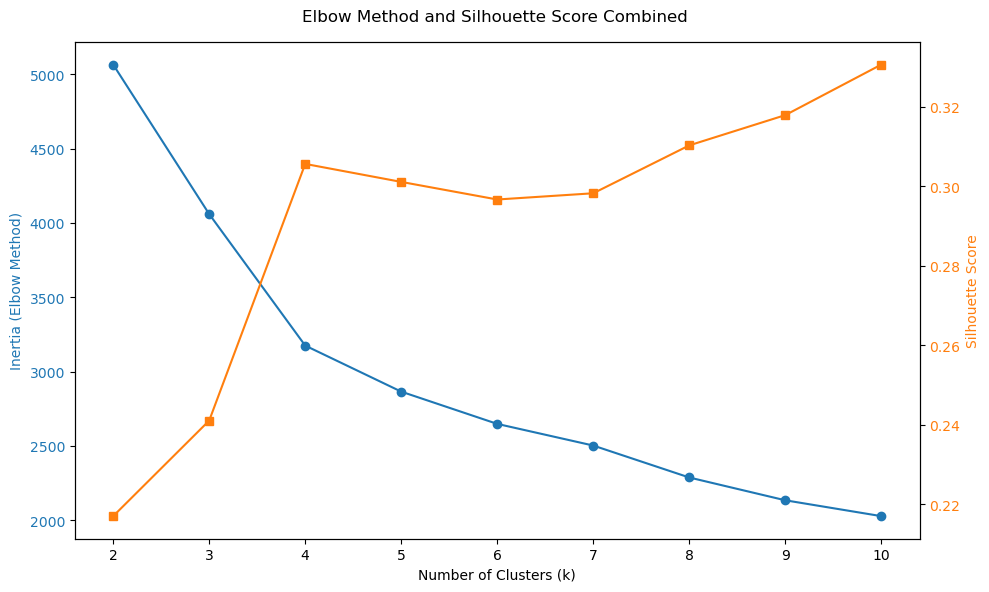

In [27]:
## 2. Select Relevant Features
features = [
    'gender', 'age_group', 'travel_frequency', 'spending_amount',
    'social_media_usage', 'primary_social_platform'
]
df_cluster = df[features].copy()

## 3. Encode Categorical Features
le = LabelEncoder()
for col in df_cluster.columns:
    df_cluster[col] = le.fit_transform(df_cluster[col])

## 4. Scale Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


range_n_clusters = list(range(2, 11))
inertia = []
silhouette_scores = []

# Recompute KMeans for each k and collect metrics
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

# Plot combined elbow and silhouette score
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Elbow Method)', color=color)
ax1.plot(range_n_clusters, inertia, marker='o', color=color, label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range_n_clusters, silhouette_scores, marker='s', color=color, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Elbow Method and Silhouette Score Combined')
fig.tight_layout()
plt.show()


## 6. Fit KMeans with Optimal K (e.g., 4)

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)






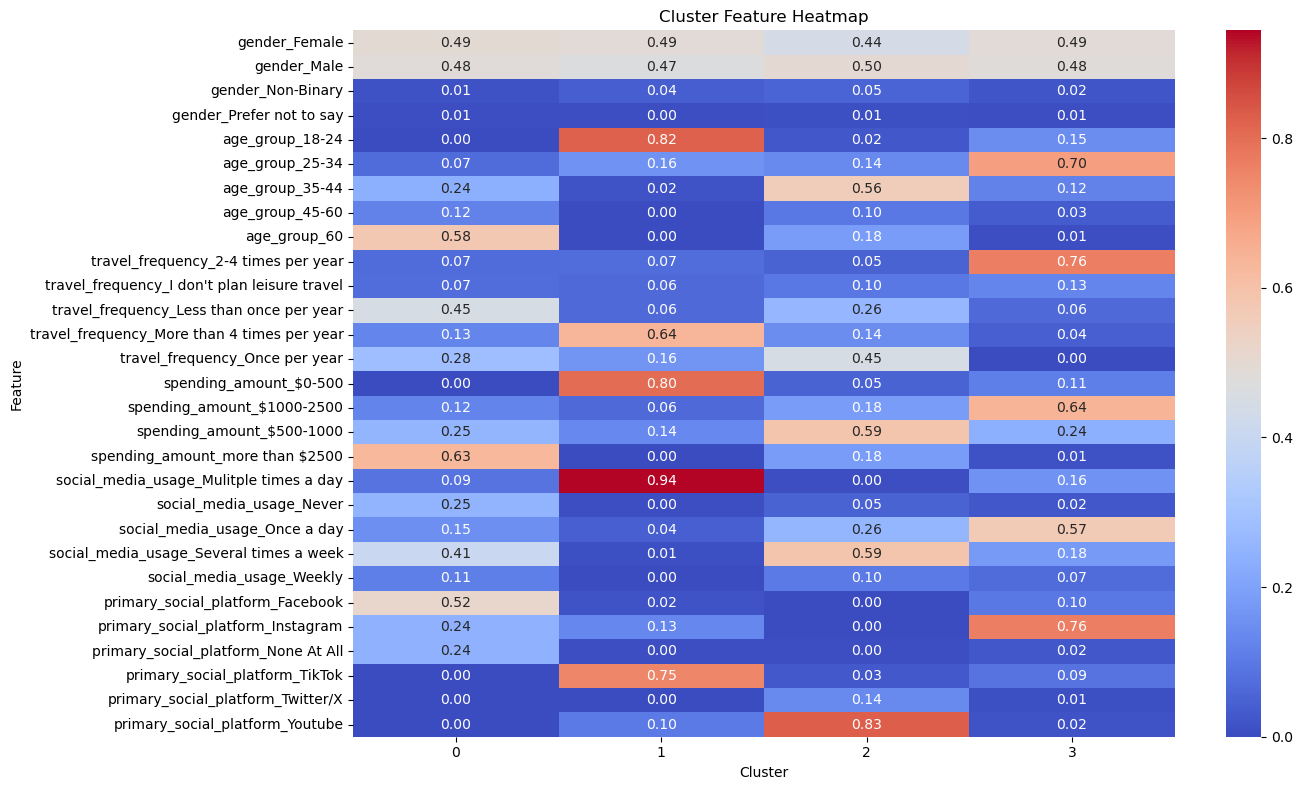

In [28]:



## 9. : Visual Heatmap of Encoded Features

encoded_features = pd.get_dummies(df[features])
cluster_means = encoded_features.groupby(df['cluster']).mean()

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Cluster Feature Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [29]:


# Group by cluster and compute the mode (most common response) for each column
cluster_characteristics = df.groupby('cluster')[features].agg(lambda x: x.mode()[0])

# Add count of respondents per cluster
cluster_characteristics['count'] = df['cluster'].value_counts().sort_index()
cluster_characteristics




gender age_group            travel_frequency  spending_amount  \
cluster                                                                  
0        Female        60     Less than once per year  more than $2500   
1        Female     18-24  More than 4 times per year           $0-500   
2          Male     35-44               Once per year        $500-1000   
3        Female     25-34          2-4 times per year       $1000-2500   

           social_media_usage primary_social_platform  count  
cluster                                                       
0        Several times a week                Facebook    279  
1        Mulitple times a day                  TikTok    251  
2        Several times a week                 Youtube    243  
3                  Once a day               Instagram    296

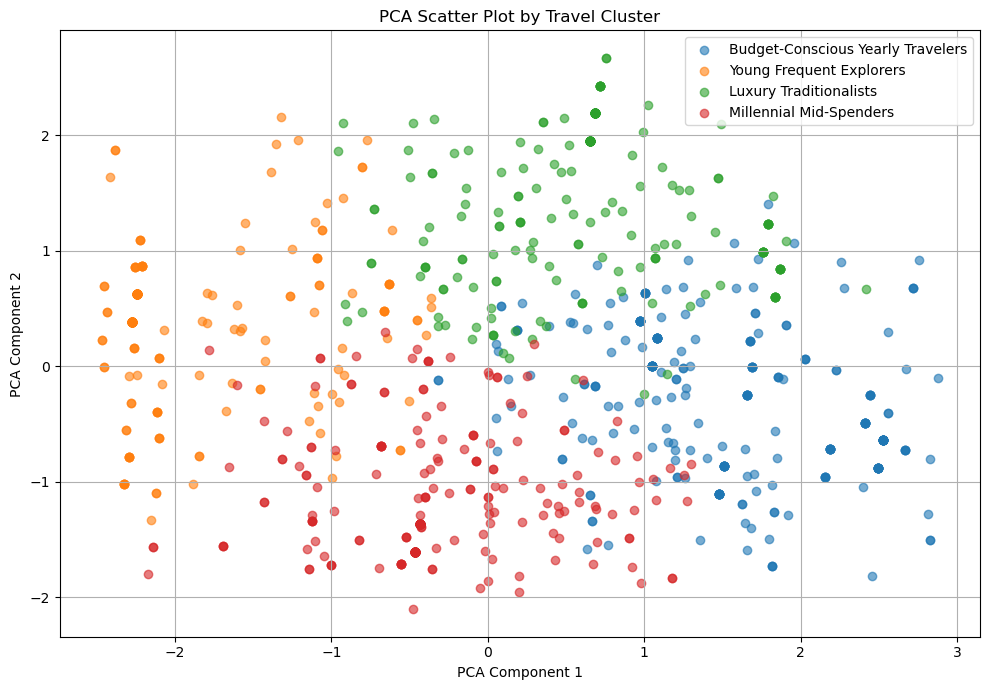

In [30]:
# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

# Map cluster labels to names
cluster_names = {
    0: "Budget-Conscious Yearly Travelers",
    1: "Young Frequent Explorers",
    2: "Luxury Traditionalists",
    3: "Millennial Mid-Spenders"
}
df['cluster_name'] = df['cluster'].map(cluster_names)

# Plot PCA scatter with cluster names
plt.figure(figsize=(10, 7))
for label, name in cluster_names.items():
    plt.scatter(
        components[df['cluster'] == label, 0],
        components[df['cluster'] == label, 1],
        label=name,
        alpha=0.6
    )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Scatter Plot by Travel Cluster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## üéØ Cluster Profiles & Marketing Recommendations

Based on our consumer survey data, we conducted a cluster analysis using behavioral features such as age, gender, spending, travel frequency, and social media use. We identified four distinct traveler segments, each with unique habits and content preferences.

This segmentation enables Expedia and its partners to deliver more targeted, relevant, and engaging travel content, increasing conversion rates and strengthening customer loyalty.

### üîπ Cluster 0: **Budget-Conscious Yearly Travelers**

* **Age**: 35‚Äì44
* **Gender**: Mostly Male
* **Travel Frequency**: Once a year
* **Spending**: \$500‚Äì\$1000
* **Platform**: YouTube
* **Social Media Usage**: Several times a week
* **Count**: \~24% of users

**üß† Behavior Insight**
They are careful planners who rely on reviews and long-form content. Often book for family or practical purposes.

**üì¢ Marketing Strategy**

* Partner with YouTubers focused on affordable travel guides and destination overviews.
* Emphasize **value-driven packages** and **trip bundling (flight + hotel)**.
* Offer tools like **price trackers, loyalty discounts**, or **early booking incentives**.
* Use **email retargeting** during peak holiday periods.

---

### üî∏ Cluster 1: **Young Frequent Explorers**

* **Age**: 18‚Äì24
* **Gender**: Mostly Female
* **Travel Frequency**: 4+ times per year
* **Spending**: Under \$500
* **Platform**: TikTok
* **Social Media Usage**: Multiple times daily
* **Count**: \~26%

**üß† Behavior Insight**
Adventurous, highly social, and always on the lookout for a good deal. Travel is lifestyle‚Äînot just leisure.

**üì¢ Marketing Strategy**

* Prioritize **short-form, viral video content** with trending audio and hashtags.
* Use influencers to showcase **budget travel hacks**, **group hostel stays**, or **impromptu weekend trips**.
* Highlight **flexible payment options** and **mobile-first experiences**.
* Offer curated guides for solo travel, digital nomads, and festival destinations.

---

### üî∑ Cluster 2: **Luxury Traditionalists**

* **Age**: 60+
* **Gender**: Mostly Female
* **Travel Frequency**: Rarely
* **Spending**: Over \$2500
* **Platform**: Facebook
* **Social Media Usage**: Weekly or less
* **Count**: \~28%

**üß† Behavior Insight**
Prefer fewer trips, but when they travel, they want comfort, safety, and premium experiences. Trust and clarity matter.

**üì¢ Marketing Strategy**

* Feature **high-end curated packages** (cruises, heritage tours, luxury resorts).
* Invest in **Facebook carousel ads** and newsletters that highlight **testimonials, ratings, and guarantees**.
* Prioritize **customer service messaging**‚ÄîVIP treatment, refund policy, accessibility.
* Use **longer planning windows** and target during off-peak seasons.

---

### üî∏ Cluster 3: **Millennial Mid-Spenders**

* **Age**: 25‚Äì34
* **Gender**: Mostly Female
* **Travel Frequency**: 2‚Äì4 times per year
* **Spending**: \$1000‚Äì\$2500
* **Platform**: Instagram
* **Social Media Usage**: Daily
* **Count**: \~29%

**üß† Behavior Insight**
Enjoy balance: they value aesthetics and new experiences but have some spending power. Travel = self-care + social currency.

**üì¢ Marketing Strategy**

* Use **Instagram stories + reels** with location tags, experiences, and influencer takeovers.
* Focus on **romantic getaways, wellness retreats**, and **experiential stays**.
* Showcase **eco-conscious choices**, **hidden gems**, and **photogenic places**.
* Offer **bundled upgrades** like spa access, breakfast included, or exclusive tours.

---

## üìå Final Thoughts

This behavioral segmentation can power Expedia‚Äôs marketing strategy in several ways:

* üéØ Better **ad targeting and platform selection**
* üß† Personalized **content strategy** by audience type
* üîÑ More effective **conversion tracking** along the customer journey
* ü§ù Improved value for **sponsored content partners**

## üìç Conclusion & Strategic Implications

This analysis reveals clear behavioral clusters among Expedia's digitally active travelers. By using K-Means clustering on key demographic and behavioral variables (age, gender, travel frequency, spending, and social media usage), we identified **four distinct traveler personas**. Each group demonstrates unique preferences in content type, platform engagement, and booking behaviors.

üîç **Key Takeaways**:
- **Young Frequent Explorers** (18‚Äì24, TikTok-centric) respond to short-form content, budget deals, and influencer travel hacks.
- **Millennial Mid-Spenders** (25‚Äì34, Instagram) balance value and experience, prioritizing wellness, aesthetics, and social sharing.
- **Budget-Conscious Yearly Travelers** (35‚Äì44, YouTube) plan deliberately and prefer reviews and price-sensitive tools.
- **Luxury Traditionalists** (60+, Facebook) book less often but spend more, valuing premium experiences, trust, and simplicity.

üìà **Strategic Value**:
These insights offer a clear framework for tailoring Expedia‚Äôs **sponsored content strategy**:
- Match platforms and formats to each cluster‚Äôs digital behavior
- Personalize messaging around trip frequency and price sensitivity
- Align influencer partnerships and visuals to segment-specific values

üìä **Operational Application**:
- Enhance ad targeting using cluster-informed personas
- Guide media buys across channels like TikTok, Instagram, YouTube, and Facebook
- Inform UI/UX improvements on Expedia‚Äôs booking funnel (e.g., curated content, platform-specific landing pages)

üéØ This segmentation empowers Expedia and its partners to **move beyond generic campaigns**, and toward **micro-targeted engagement** that resonates with evolving traveler needs in a competitive, content-driven landscape.
